In [1]:
%matplotlib notebook
from colicoords import CellPlot, Cell, load
from colicoords.support import crop_cell
import matplotlib.pyplot as plt
import tifffile
import numpy as np

In [3]:
bf_500 = np.load('bf_noise_500_photons.npy')[:50]
bf_1000 = np.load('bf_noise_1000_photons.npy')[:50]
bf_10000 = np.load('bf_noise_10000_photons.npy')[:50]

<IPython.core.display.Javascript object>


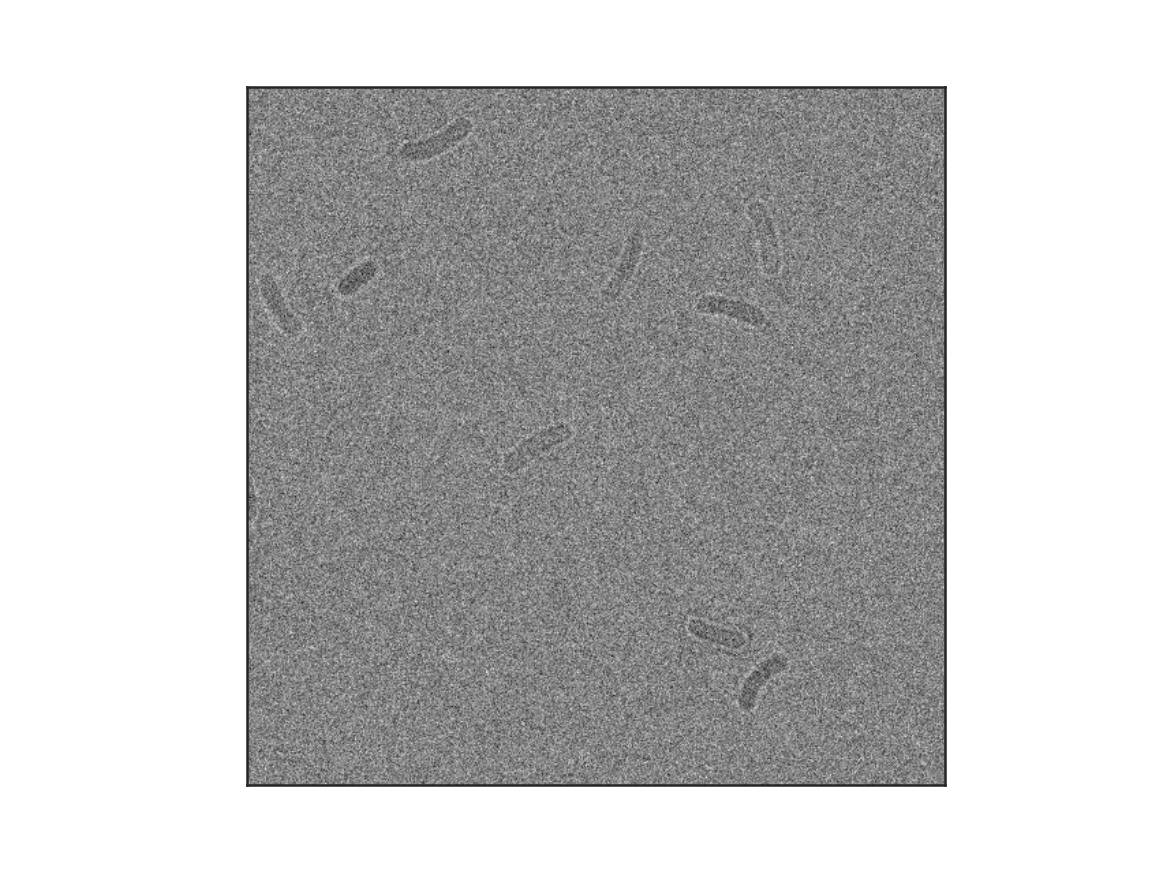

In [62]:
plt.figure()
plt.imshow(bf_500[0], cmap='gray')
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.savefig('imgs/bf_500.jpg', dpi=600, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


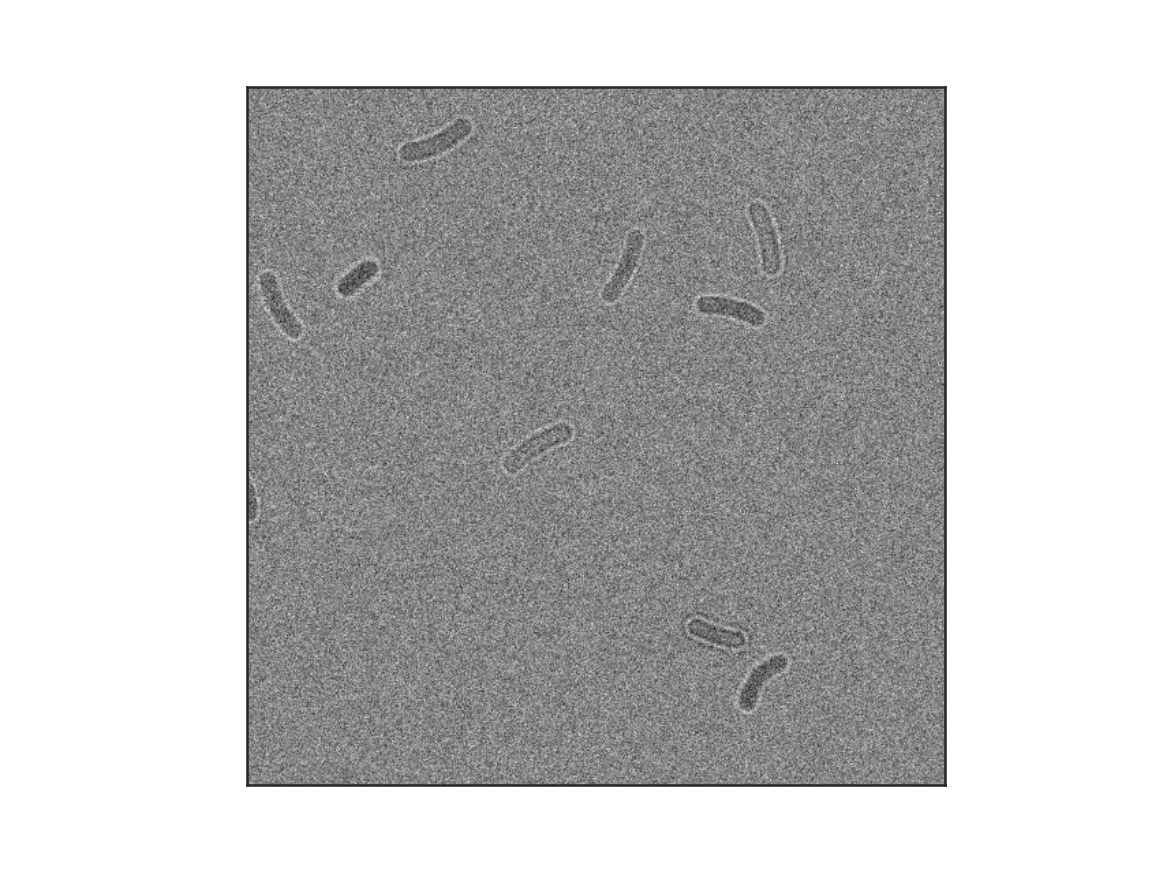

In [63]:
plt.figure()
plt.imshow(bf_1000[0], cmap='gray')
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.savefig('imgs/bf_1000.jpg', dpi=600, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


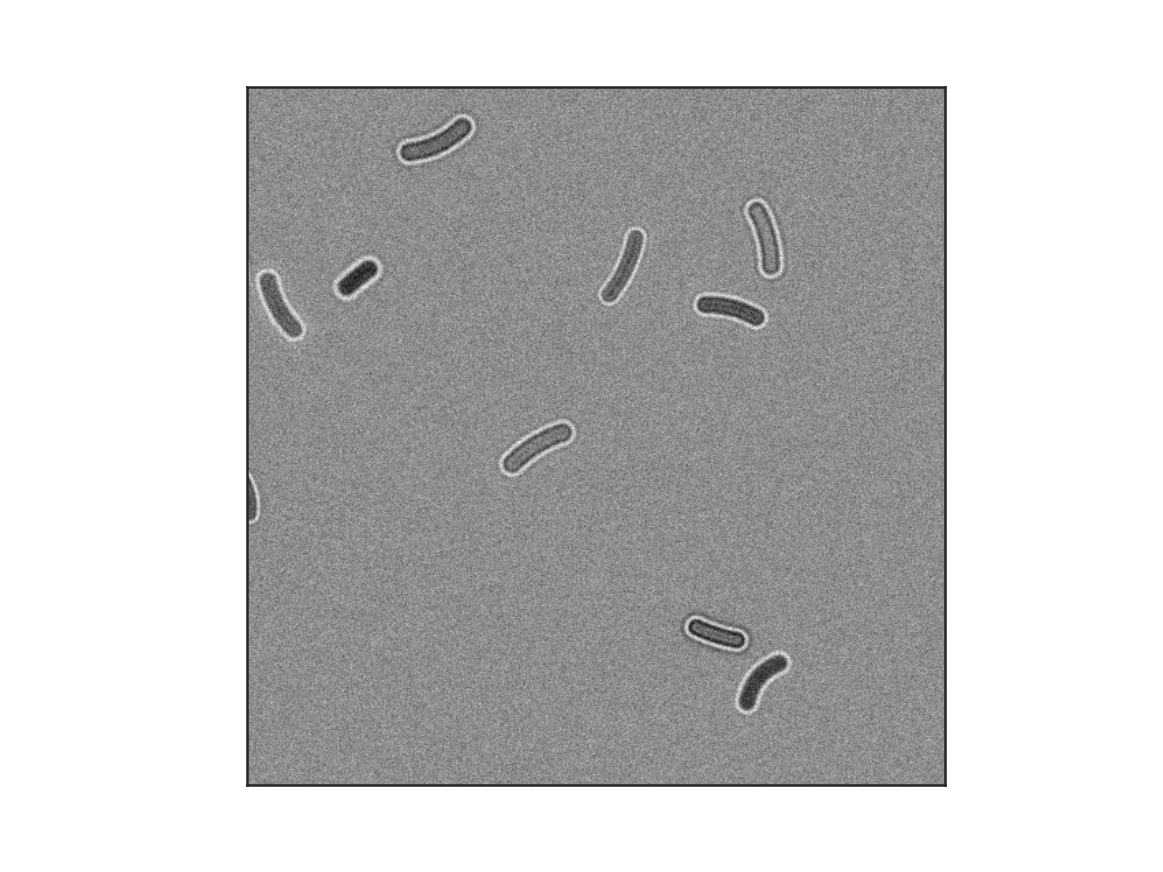

In [64]:
plt.figure()
plt.imshow(bf_10000[0], cmap='gray')
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.savefig('imgs/bf_10000.jpg', dpi=600, bbox_inches='tight', pad_inches=0)

In [11]:
cells = load('temp_cells.hdf5')
c = cells[0]

In [12]:
c.data.shape

(63, 97)

In [19]:
c_cropped = crop_cell(c, (40, 75))

In [20]:
cp = CellPlot(c_cropped)

<IPython.core.display.Javascript object>


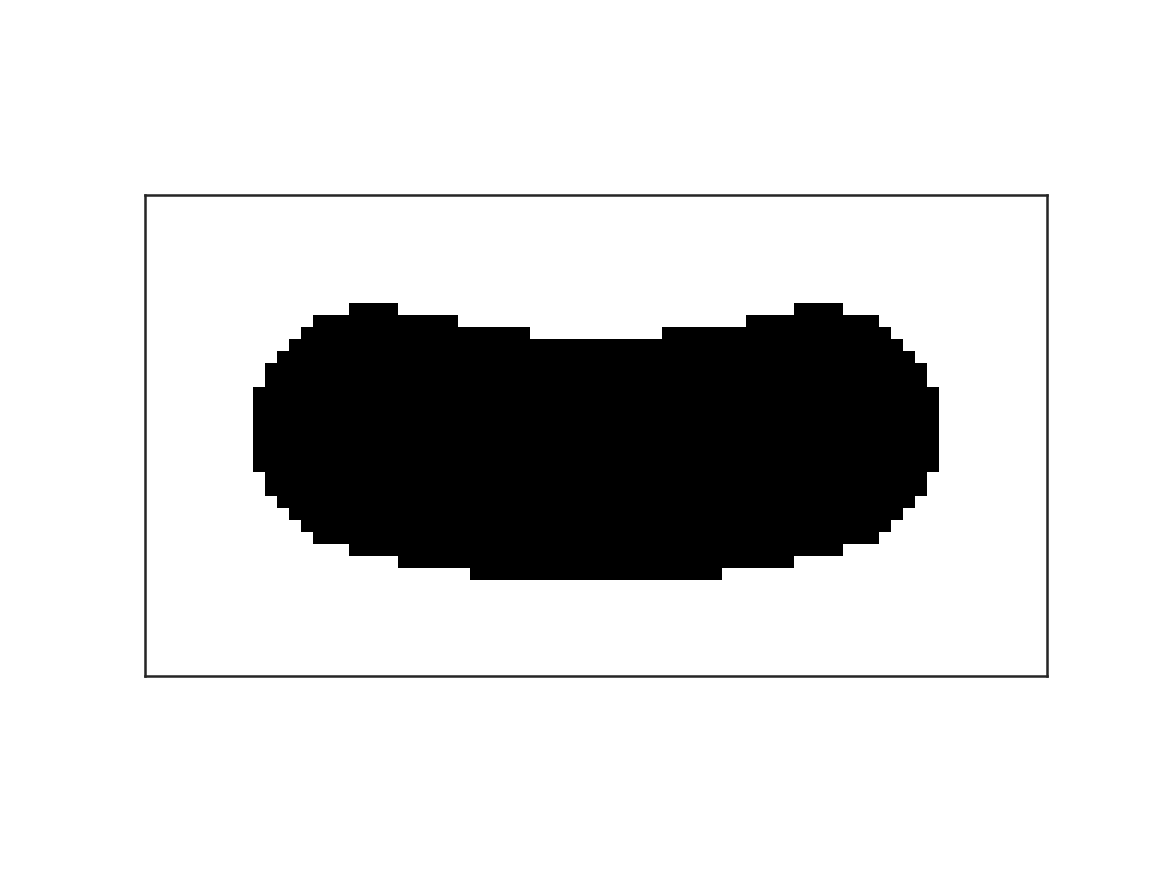

In [65]:
plt.figure()
cp.imshow('binary')
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.savefig('imgs/cell_binary.jpg', bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


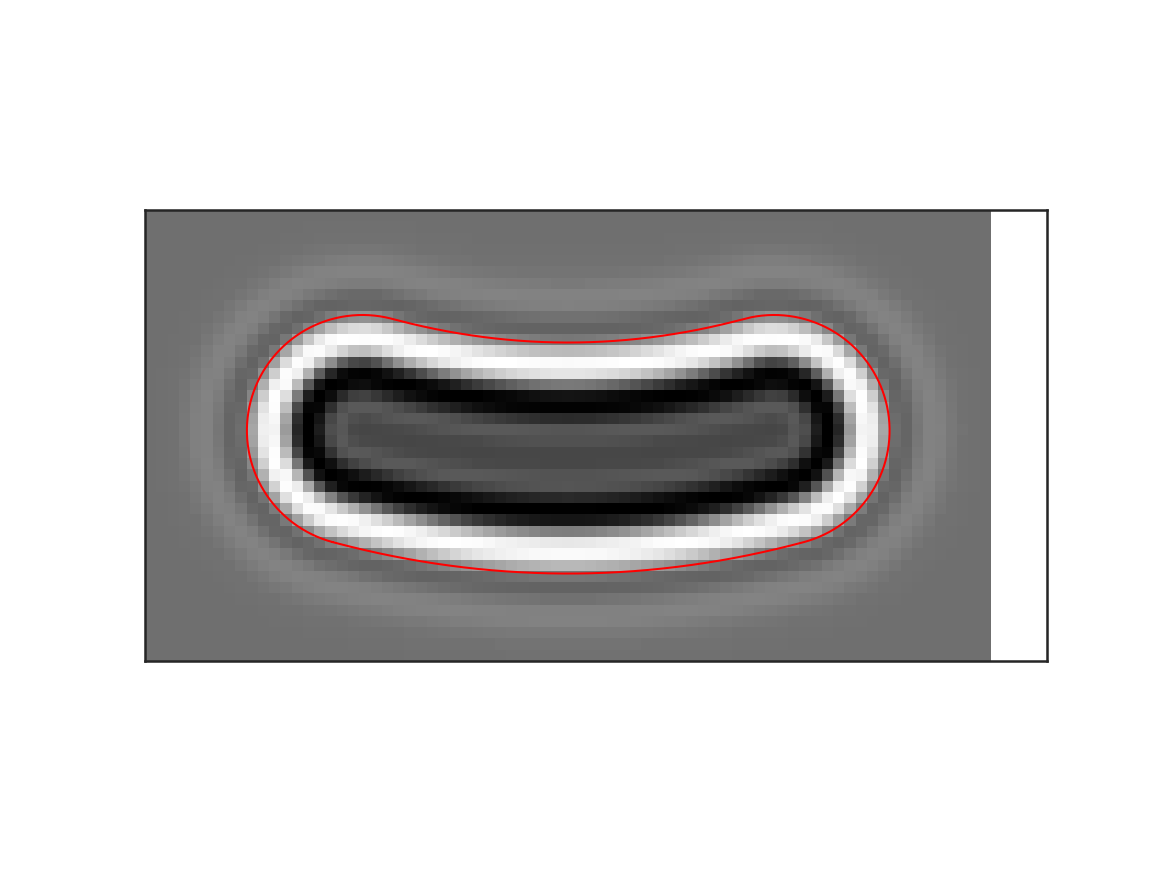

In [73]:
plt.figure()
im = cp.imshow('brightfield', cmap='gray')
cp.plot_outline()
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.savefig('imgs/cell_brightfield.jpg', dpi=600, bbox_inches='tight', pad_inches=0)

In [58]:
import matplotlib.colors as mcolors

#https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [ c('black'), c('magenta')])

In [57]:
gvb = make_colormap(
    [c('black'), c('cyan')])

In [37]:
cmap = plt.cm.get_cmap(rvb) if type(rvb) == str else rvb

<IPython.core.display.Javascript object>


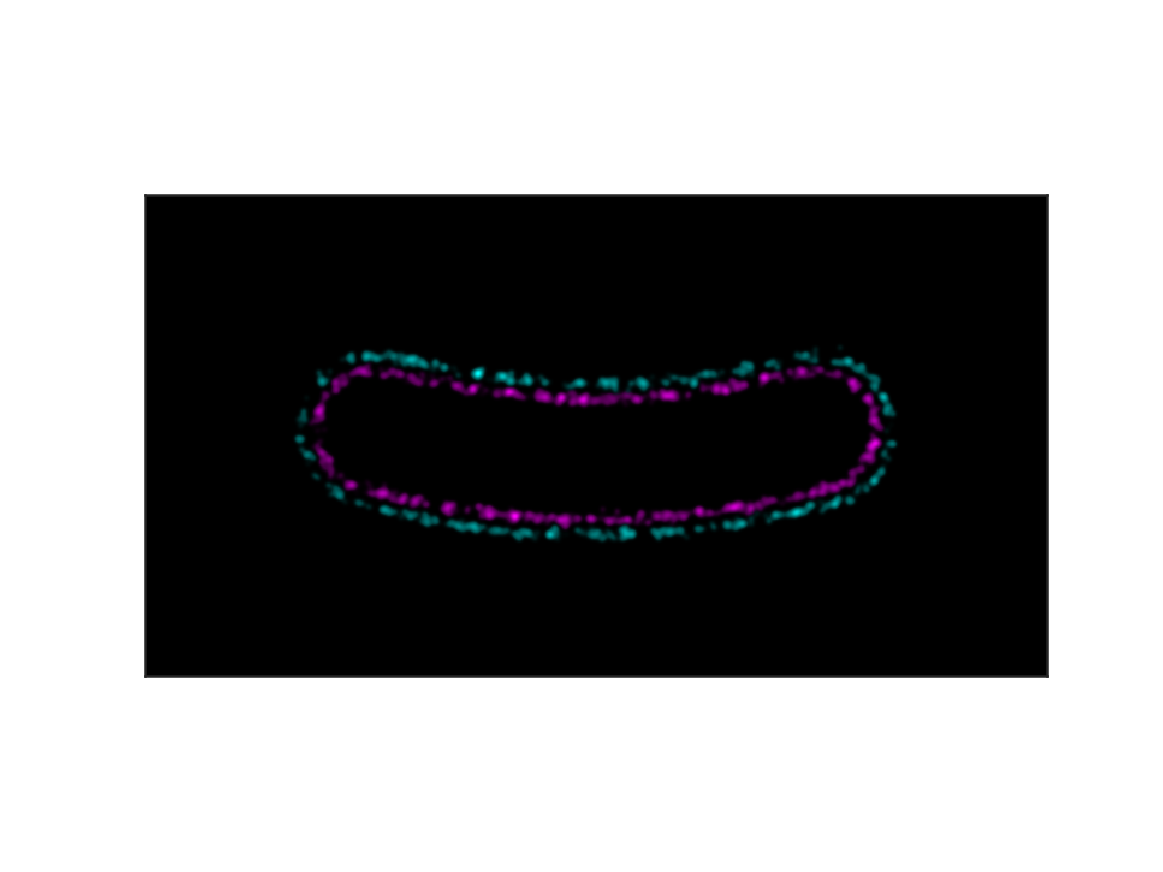

In [67]:
plt.style.use('seaborn-white')

plt.figure()
cp.imshow(np.zeros(c_cropped.data.shape), cmap='gray')
cp.plot_storm(data_name='storm_inner', upscale=10, method='gauss', alpha_cutoff=0.25, cmap=rvb)
cp.plot_storm(data_name='storm_outer', upscale=10, method='gauss', alpha_cutoff=0.25, cmap=gvb)

plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.savefig('imgs/cell_storm.jpg', dpi=600, bbox_inches='tight', pad_inches=0)

# R comparisons

In [87]:
d = c_cropped.data.copy()
d.data_dict['binary'] = d.binary_img.astype(np.int32)

In [85]:
d.binary_img.dtype

dtype('int64')

In [91]:
c_new = Cell(d)
cp_new = CellPlot(c_new)

<IPython.core.display.Javascript object>


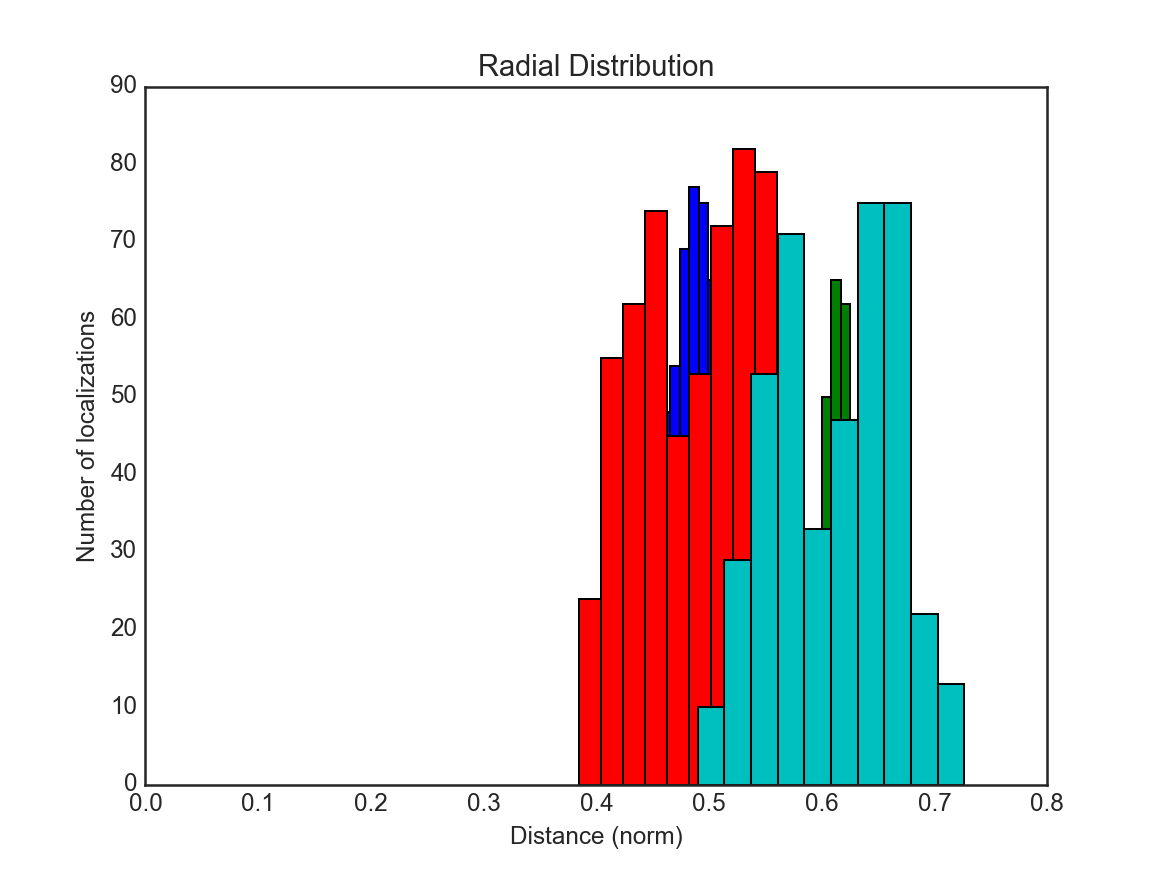

In [98]:
plt.figure()
cp.hist_r_storm('storm_inner')
cp.hist_r_storm('storm_outer')
cp_new.hist_r_storm('storm_inner')
cp_new.hist_r_storm('storm_outer')
plt.gca().set_xlim(0, 0.8)
plt.savefig('imgs/r_dist_hist.png', bbox_inches='tight', pad_inches=0)

In [94]:
r_vals_gt = c_cropped.coords.calc_rc(c_cropped.data.data_dict['storm_inner']['x'], c_cropped.data.data_dict['storm_inner']['y'])

In [95]:
r_vals_m = c_new.coords.calc_rc(c_new.data.data_dict['storm_inner']['x'], c_new.data.data_dict['storm_inner']['y'])

<IPython.core.display.Javascript object>


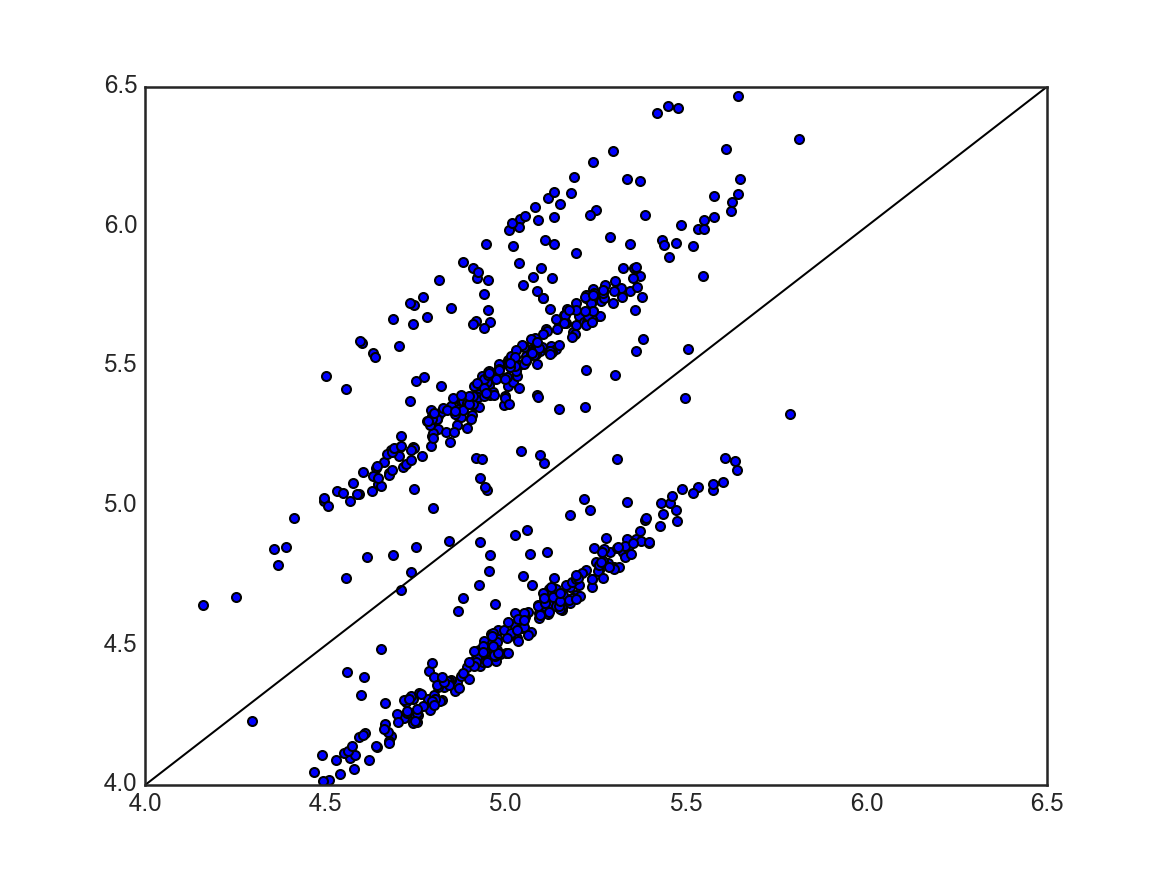

In [104]:
plt.figure()
plt.scatter(r_vals_gt, r_vals_m)
plt.xlim(4, 6.5)
plt.ylim(4, 6.5)
plt.plot([0, 10], [0, 10], color='k')
plt.savefig('imgs/r_dist_scatter.png', bbox_inches='tight', pad_inches=0)

In [17]:
gt_cells = load('cell_obj/gt_cells_ph_10000_match_raw.hdf5')

In [13]:
m_cells = load('cell_obj/m_cells_ph_10000_match_raw.hdf5')


In [18]:
i = 10
len(gt_cells[i].data.data_dict['storm_inner']), len(m_cells[i].data.data_dict['storm_inner'])

(425, 480)

In [15]:
m_cells[0].name

'img000c1'

<IPython.core.display.Javascript object>


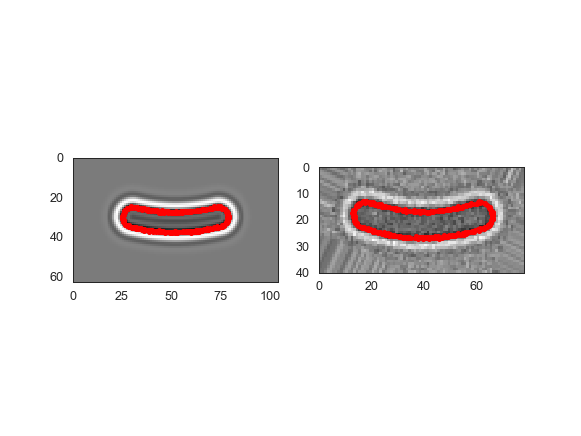

In [9]:
i = 0
cp_gt = CellPlot(gt_cells[i])
cp_m = CellPlot(m_cells[i])

fig, axes = plt.subplots(1, 2)
cp_gt.imshow('brightfield', ax=axes[0])
cp_gt.plot_storm(ax=axes[0])

cp_m.imshow('brightfield', ax=axes[1])
cp_m.plot_storm( ax=axes[1])